In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import nltk.corpus
import seaborn as sns
import matplotlib.pyplot as plt
import re
import unidecode
from wordcloud import WordCloud

#### Leitura dos Dados

In [2]:
df_fake = pd.read_excel('data/FakeRecogna_no_removal_words.xlsx')
df_fake.head()

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nArthur Lira fraudou a votação sobre voto i...,Boato – Está comprovado que a votação sobre o ...,bomba lira fraudar o votação brasília explodir...,política,17/08/2021,\nEdgard Matsuki,https://www.boatos.org/politica/arthur-lira-fr...,0
1,WhatsApp agora permite silenciar conversas e g...,"Opção vinha sendo testada no aplicativo, e foi...",o whatsapp liberar quinta-feira atualização ap...,política,23/10/2020 10h02,Por G1,https://g1.globo.com/economia/tecnologia/notic...,1
2,"Com Lula, Bolsonaro e Ciro, Fortaleza vira mic...",NaN,debater propor o cidade o campanha prefeitura ...,política,27/10/2020 04h00,Carlos Madeiro,https://noticias.uol.com.br/eleicoes/2020/10/2...,1
3,Alesp aprova projeto que multa em até R$ 100 m...,NaN,o alesp assembleia legislativo paulo aprovar h...,saúde,10/02/2021 23h56,10/02/2021 23h56,https://noticias.uol.com.br/saude/ultimas-noti...,1
4,\n Não é verdade que Fauci sabia há 15 anos q...,Publicações compartilhadas dezenas de vezes de...,“ fauci aprovar o hidroxicloroquina haver ano ...,saúde,11/08/2020 às 20:45,AFP Austrália,https://checamos.afp.com//nao-e-verdade-que-fa...,0


In [3]:
df_fake.Noticia[0]

'bomba lira fraudar o votação brasília explodir votar impresso auditável perder roubar umar haver fraudar o votação o câmara deputar imaginar o eleição presidencial bomba bomba bomba bomba lira fraudar o votação brasília explodir'

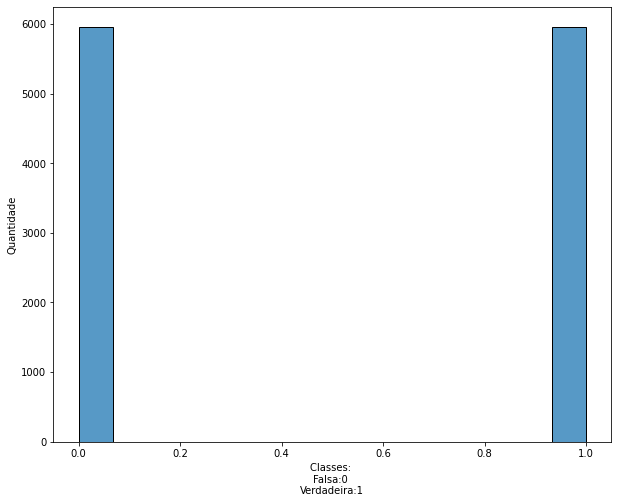

In [4]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_fake,x='Classe')
plt.xlabel('Classes: \nFalsa:0 \nVerdadeira:1')
plt.ylabel('Quantidade')
plt.show()

### Remover Stop Words

In [5]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [6]:
def remove_stop_words(texto,stopwords):
    texto_limpo = " ".join(word for word in texto.split() if word not in stopwords)
    #texto_limpo = unidecode.unidecode(texto_limpo)
    texto_limpo = re.sub(r'[^\w\s]', '', str(texto_limpo))
    return texto_limpo

In [7]:
df_fake['noticia_limpa'] = df_fake['Noticia'].apply(lambda x: remove_stop_words(x, stopwords))
df_fake['noticia_limpa'] = df_fake['noticia_limpa'].apply(str)

In [8]:
print(df_fake['noticia_limpa'][0])
print('\n')
print(df_fake['Noticia'][0])

bomba lira fraudar votação brasília explodir votar impresso auditável perder roubar umar fraudar votação câmara deputar imaginar eleição presidencial bomba bomba bomba bomba lira fraudar votação brasília explodir


bomba lira fraudar o votação brasília explodir votar impresso auditável perder roubar umar haver fraudar o votação o câmara deputar imaginar o eleição presidencial bomba bomba bomba bomba lira fraudar o votação brasília explodir


### Word Cloud

In [9]:
df_false = df_fake[df_fake["Classe"] == 0]
df_true = df_fake[df_fake["Classe"] == 1]

texto_true = ' '.join(frase for frase in df_true['noticia_limpa'].tolist())
texto_false = ' '.join(frase for frase in df_false['noticia_limpa'].tolist())

wordcloud_true = WordCloud(background_color="white").generate(texto_true)
wordcloud_false = WordCloud(background_color="white").generate(texto_false)

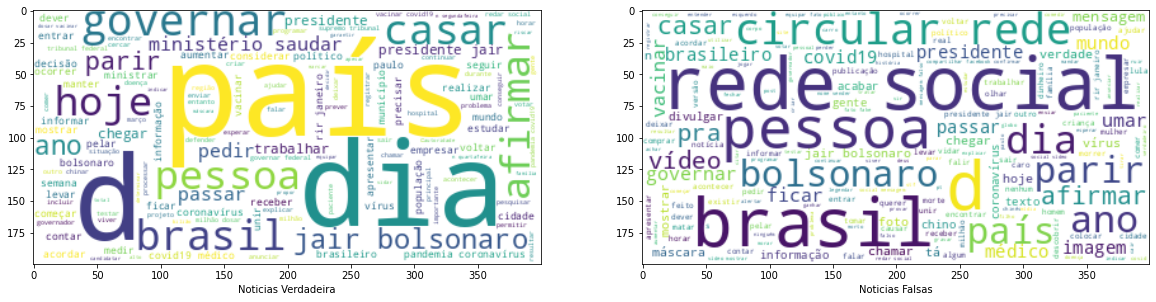

In [10]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.xlabel(('Noticias Verdadeira'))
plt.imshow(wordcloud_true, interpolation='bilinear')

plt.subplot(1, 2, 2)
plt.xlabel(('Noticias Falsas'))
plt.imshow(wordcloud_false, interpolation='bilinear')
plt.show()